# Pizza Dataset

Hello,

This is one of my first analysis, that i did on my own.
The Dataset contains real orders history of one polish pizza restaurant.
14773 orders between 2016-10-11 12:00 and 2018-06-19 14:00.
Hope you will enjoy it. <br>
If the are some errors just re-execute the line.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./pizzeria_tania_data_simplified.csv")

In [3]:
df

,count,year,month,day,hour,working_day,weekend_day,public_holiday
0,5,2016,10,11,12,1,0,0
1,1,2016,10,11,13,1,0,0
2,1,2016,10,11,14,1,0,0
3,0,2016,10,11,15,1,0,0
4,0,2016,10,11,16,1,0,0
...,...,...,...,...,...,...,...,...
14767,0,2018,6,19,10,1,0,0
14768,1,2018,6,19,11,1,0,0
14769,13,2018,6,19,12,1,0,0
14770,7,2018,6,19,13,1,0,0


In [4]:
df.describe().round(3)

,count,year,month,day,hour,working_day,weekend_day,public_holiday
count,14772.000,14772.000,14772.000,14772.000,14772.000,14772.000,14772.000,14772.000
mean,4.256,2017.143,6.258,15.704,11.500,0.687,0.286,0.040
std,5.968,0.622,3.658,8.739,6.922,0.464,0.452,0.197
min,0.000,2016.000,1.000,1.000,0.000,0.000,0.000,0.000
25%,0.000,2017.000,3.000,8.000,5.750,0.000,0.000,0.000
50%,0.000,2017.000,6.000,16.000,12.000,1.000,0.000,0.000
75%,8.000,2018.000,10.000,23.000,17.000,1.000,1.000,0.000
max,35.000,2018.000,12.000,31.000,23.000,1.000,1.000,1.000


This table provides a first overview of the data.

# Questions to which the data set could answer:


# Hours:
When are the most Pizzas sold?<br>
How many pizzas were sold on average in the first and last hour of the day?<br>
Are these values different on weekends / public holidays?

# Days:
On which days did they sell the most pizzas on average ?<br>
Is there a good day to keep the restaurant closed?<br>

# Months:
Do they sell on specific months more if you compare them? <br>
Are some months weak compared to others?<br>
How many pizzas are sold per month?

# Developement:
Is there a developement over the time? Is there a trend? Are you able to make a prediction?

# Workdays:
Is there a significant difference between workdays and weekenddays?<br>

# The Data in Context:
How ist the developement in a long term view? Is there a dangerous Trend?<br>
How can you adjust the opening times?<br>



# Data-prepping

In [5]:
daylist= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [6]:
i = 1
h = 12 
append_daylist = []
for _ in range(len(df.index)):
    append_daylist.append(daylist[i %7])
    h = h +1 
    if h%24 ==0:
        i= i+1

In [7]:
df['dayname'] = append_daylist

In [8]:
daily_sum = df.groupby(['year','month','day']).sum()
x=df # copy for manipulation purposes
x=x.drop(x[(x['month'] == 10) & (x['year'] == 2016)].index) # drop only half documented months
x=x.drop(x[(x['month'] == 6) & (x['year'] == 2018)].index)
monthly_sum = x.groupby(['year','month']).sum()

In [9]:
daily_sum_gb = df.groupby(['dayname'])

In [10]:
daily_agg= daily_sum_gb.agg({
    'count' : ['sum' , 'mean']
})

In [11]:
daily_agg=daily_agg.reindex(daylist)

In [12]:
hours_gb = df.groupby(['hour'])

In [13]:
hours_agg= hours_gb.agg({
    'count' : ['sum' , 'mean']
})

In [14]:
daytype_gb = df.groupby(['working_day'])

In [15]:
daytype_agg= daytype_gb.agg({
    'count' : ['sum' , 'mean']
})

# Summary

The data set was brought into various forms. The dataset has also been expanded by a column containing the name of the day. We now have:<br>
dayly and monthly_sum are aggregated datasets that indicate the sum over the respective periods.<br>
dayly_agg groups the data by the name of the day. (sum and mean)<br>
hours_agg groups the data by the hours the records were made.(sum and mean) <br>
daytype_agg groups the data by working days and weekenddays 


# Correlationmatrix 
The correlation matrix can give a good overview of which variables influence each other and again give new information on possible questions.

In [16]:
df_corr= df.corr().round(2)

<AxesSubplot:>

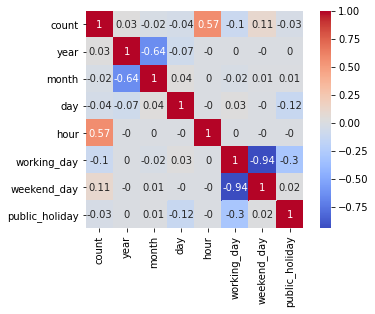

In [17]:
sns.heatmap(df_corr, 
        xticklabels=df_corr.columns,
        yticklabels=df_corr.columns,
        annot = True,
        cmap = 'coolwarm',
        square = True)

# Evaluation

It seems that the day, month, or year of the date doesn't really affect the counted pizzas. The hour parameter in particular seems to influence the sales. 
There are also differences between working days and weekend days.
To confirm these assumptions, it is worth visualizing the data first:

<AxesSubplot:xlabel='dayname'>

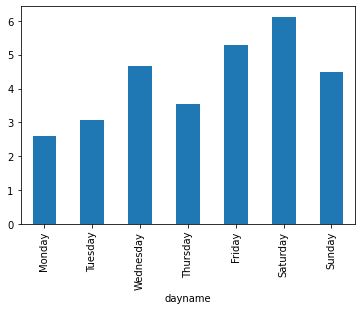

In [18]:
daily_agg[('count','mean')].plot(kind='bar')

You can see that the value from the correlation matrix was not correct. Since the data set is very finely structured, the day doesn't seem to have much influence on sales. <br>
However, if you visualize the grouped data, you can see that Wednesday, Friday and Saturday have the highest average values.
Why Wednesday stands out from the days of the week cannot be seen from the data. There is no information about the company (opening times, promotions, etc.)


# Influence of workingdays

<AxesSubplot:xlabel='working_day'>

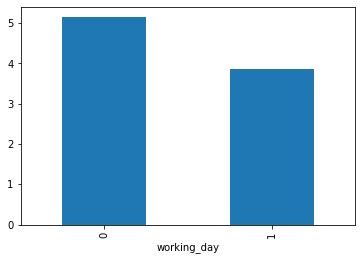

In [19]:
daytype_agg[('count', 'mean')].plot(kind='bar')

The average pizzas sold per hour is on weekenddays significantly higher.

# Influence of the month

<AxesSubplot:xlabel='year,month'>

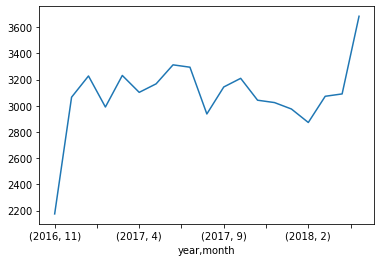

In [20]:
monthly_sum['count'].plot()

In [21]:
monthly_sum['count'].describe().round(2)

count      19.00
mean     3084.68
std       283.29
min      2174.00
25%      3007.00
50%      3090.00
75%      3218.00
max      3683.00
Name: count, dtype: float64

<AxesSubplot:>

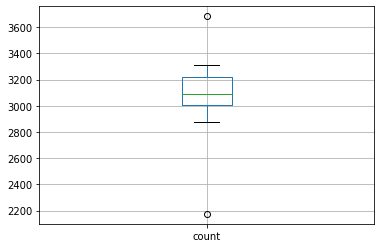

In [22]:
monthly_sum.boxplot(column = 'count')

<AxesSubplot:ylabel='Frequency'>

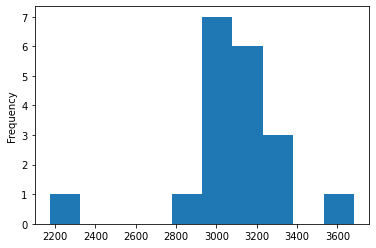

In [23]:
monthly_sum['count'].plot(kind= 'hist', bins=10)

With the exception of two "outliers", the rest of the data are centered around the mean.
However, deviations are "normal" for monthly data, simply because of the different lengths.
So in conclusion: The month does not effect the sold pizzas significantly.

# Influence of the hour

<AxesSubplot:xlabel='hour'>

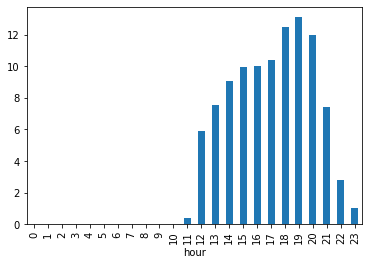

In [24]:
hours_agg[('count', 'mean')].plot(kind='bar')

In [25]:
hours_agg.round(3)

count        
       sum    mean
hour              
0        7   0.011
1        0   0.000
2        0   0.000
3        0   0.000
4        0   0.000
5        0   0.000
6        0   0.000
7        0   0.000
8        0   0.000
9        3   0.005
10       9   0.015
11     235   0.383
12    3618   5.873
13    4651   7.550
14    5584   9.080
15    6142   9.971
16    6166  10.010
17    6419  10.420
18    7681  12.469
19    8088  13.130
20    7354  11.958
21    4562   7.430
22    1710   2.780
23     639   1.037

You can clearly see that there is a strong dependency between sales and the time of day.
The three highest average values ​​were recorded especially between 6 p.m. and 9 p.m.
The only question is whether the opening times: 0-1am and 9-11am make sense. Over the period of 617 days, only 19 pizzas were sold during these times.

# Predict sold pizzas by knowing some data:


In [43]:
le = LabelEncoder()
day_labels = le.fit_transform(df['dayname'])
day_mappings = {index: label for index, label in 
                  enumerate(le.classes_)}
df['day_id'] = day_labels

In [44]:
mlr_df=df.query('count > 0') # exclude closed hours(and maybe hours with no sold pizza)

In [45]:
X = mlr_df[['hour','day_id','working_day','weekend_day', 'year']]
Y = mlr_df['count']
X_train,X_test , Y_train, Y_test = train_test_split(X,Y, test_size = 0.3 , random_state = 0)

In [46]:
MLR = LinearRegression()
MLR.fit(X_train,Y_train)

LinearRegression()

In [47]:
Y_predict = MLR.predict(X_test)
val = pd.DataFrame()
val['Y_test'] = Y_test
val['Y_predict'] = Y_predict
val.head(20)

,Y_test,Y_predict
2804,17,11.747570
7264,7,7.819606
4801,7,13.354525
8396,6,8.837704
12696,10,13.237130
8612,16,8.774171
3530,4,9.792269
13007,2,9.834491
7488,10,13.115884
10094,5,7.708030


It doesn't look like the hourly sales can be predicted. <br>
Using an example, I will show that this is very difficult due to the high variance

In [48]:
df.query('hour == 17')['count'].describe().round(2)

count    616.00
mean      10.42
std        4.49
min        0.00
25%        7.75
50%       10.00
75%       13.00
max       26.00
Name: count, dtype: float64

<AxesSubplot:ylabel='Frequency'>

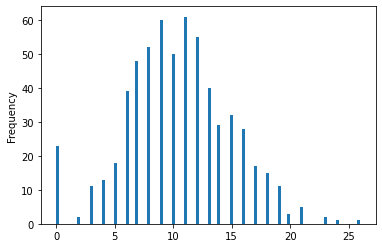

In [49]:
df.query('hour == 17')['count'].plot(kind='hist', bins = 100)

As you see the average for 5 pm is 10.42 but the values spread from 0 to 26.<br>
In conclusion : A prediction by using the hours is not really accurate.
If we assume a normal-distribution for every hour  we could predict a 95% interval.

In [51]:
hr_df=df.query('count > 0')
X = hr_df[['hour']]
Y = hr_df[['count']]
hr= LinearRegression()
hr.fit(X,Y)

LinearRegression()

In [59]:
def interval(hour,x):  # with x as the factor for the sd (0-3)
    if x > 3 or x <0:
        print("Try again with a number between 0-3 as x")
    pred = round(float(hr.predict([[hour]])),2)
    sd = round(df.query('hour == @hour')['count'].std(),2)
    prob = [0.0,68.27,95.45,99.73]
    print("The sales of this hour will be between " + str(round((pred - x*sd) ,2)) + " and " + str(round((pred + x*sd),2)) + " with a chance of about " + str(prob[x]) +  " %" )

In [60]:
interval(17,1)

The sales of this hour will be between 5.3 and 14.28 with a chance of about 68.27 %


In [66]:
interval(17,2,)

The sales of this hour will be between 0.81 and 18.77 with a chance of about 95.45 %


In [64]:
size_cond=len(df.query('count != 0 & hour == 17  & count > 0.81 & count < 18.77').index)
size_full = len(df.query('count != 0 & hour == 17').index)
round(size_cond / size_full,4)

0.9612

So this is approach is just slightly inaccurate and could be used to calculate the range of orders for a specific hour.

# Future Developement ? 


We are now assuming slight linear growth for the development of sales.<br>
So we're doing a regression based on the given timespan. <br>

In [67]:
ds=daily_sum

<AxesSubplot:xlabel='year,month,day'>

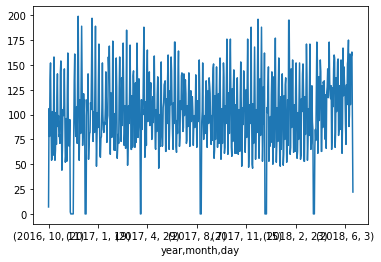

In [68]:
daily_sum['count'].plot()

In [70]:
model = LinearRegression()
y = ds['count'] 
x= list(range(0,len(ds.index)))
x=np.reshape(x, (-1, 1))
model.fit(x,y)
inter=model.intercept_.round(2)
coef=float(model.coef_.round(2))

In [71]:
inter

94.97

In [72]:
coef *365

7.3

The linear regression over the daily data determines a coefficient of 7.3.
This means that the pizzeria sells 7.3 more pizzas per day every year. This proves that the sold amount is continuously increasing.
The model predicts the following value for 1 year after the end of the recording:

In [73]:
round(float(model.predict([[len(daily_sum.index)+365 ]])),2)

117.05

In [74]:
yp=model.predict(x)

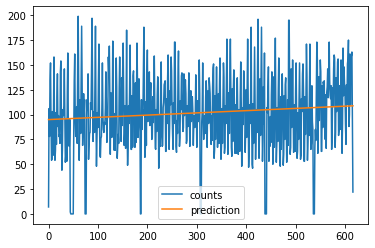

In [75]:
plt.plot(x,y, label='counts')
plt.plot(x,yp, label='prediction')
plt.legend(loc='best')
plt.show()

You can see here again that the model can hardly be used to predict daily values. <br>
However, you can see that the development, as already mentioned, is positive.

# Needed for summary:

In [79]:
df.query('hour == 0 & count > 0')

,count,year,month,day,hour,working_day,weekend_day,public_holiday,dayname,day_id
12002,4,2018,2,24,0,0,1,0,Friday,0
13680,2,2018,5,5,0,0,1,0,Friday,0
14518,1,2018,6,9,0,0,1,0,Friday,0


# What have we learned?

The big facts are:<br>

The best selling days are Saturday, Friday and Wednesday! <br>
The average sold pizzas are lower on working days!<br>
6 pm to 9 pm are the best selling times!
On this timelots you should be prepared for a higher workload<br>

It does not make sense to open from 0 to 1 am and from 9 to 11 am. Without know the costs I can say that it will not pay off.As Example: <br> 
There are 616 entrees for 0 to 1 am but only 7 pizzas sold. Considering a loan or oppertunity costs of 10 euro per hour (really optimistic estimation) and an average price of 7 euro (also estimated) means a loss of 6111 euros. So there is a huge potential in justing closing the restaurant for these hours.<br> 

Last fact : They is a positive developement over the timespan. There is no danger in sight! (only based on the given data)


Thank you for reading my analysis :D <br>

If you want to see more projects or you would like to contact me here are my important links: https://linktr.ee/florian_hx <br>
I would love to get some feedback.

Your Florian 
